In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eGFR_baseline = "94.8  19.6 90.8  19.0 89.2  18.7 86.5  19.3 90.4  19.4"
eGFR_final = "84.6  18.3 82.0  17.6 81.4  17.7 79.3  20.2 81.9  18.6"

In [5]:
print(repr(eGFR_baseline))

'94.8 \x01 19.6 90.8 \x01 19.0 89.2 \x01 18.7 86.5 \x01 19.3 90.4 \x01 19.4'


In [3]:
eGFR_baseline_clean = eGFR_baseline.replace('\x01', '').split()
eGFR_final_clean = eGFR_final.replace('\x01', '').split()

In [6]:
eGFR_baseline_num = [float(x) for x in eGFR_baseline_clean]
eGFR_final_num = [float(x) for x in eGFR_final_clean]

In [7]:
n_patients = [3460, 3394, 3317, 3167, 13338]

In [15]:
baseline_pairs = [eGFR_baseline_num[i:i+2] for i in range(0, len(eGFR_baseline_num), 2)]
final_pairs = [eGFR_final_num[i:i+2] for i in range(0, len(eGFR_final_num), 2)]

data = {
    'Quartile': ['Q1', 'Q2', 'Q3', 'Q4', 'Total'],
    'n_patients': n_patients,
    'baseline_mean': [pair[0] for pair in baseline_pairs],
    'baseline_SD': [pair[1] for pair in baseline_pairs],
    'final_mean': [pair[0] for pair in final_pairs],
    'final_SD': [pair[1] for pair in final_pairs]
}

In [16]:
eGFR_df = pd.DataFrame(data)
eGFR_df

,Quartile,n_patients,baseline_mean,baseline_SD,final_mean,final_SD
0,Q1,3460,94.8,19.6,84.6,18.3
1,Q2,3394,90.8,19.0,82.0,17.6
2,Q3,3317,89.2,18.7,81.4,17.7
3,Q4,3167,86.5,19.3,79.3,20.2
4,Total,13338,90.4,19.4,81.9,18.6


In [17]:
eGFR_df['mean_change'] = eGFR_df['final_mean'] - eGFR_df['baseline_mean']
eGFR_df['SEM'] = np.sqrt(eGFR_df['baseline_SD']**2 + eGFR_df['final_SD']**2) / np.sqrt(eGFR_df['n_patients'])

In [21]:
eGFR_df

,Quartile,n_patients,baseline_mean,baseline_SD,final_mean,final_SD,mean_change,SEM
0,Q1,3460,94.8,19.6,84.6,18.3,-10.2,0.455871
1,Q2,3394,90.8,19.0,82.0,17.6,-8.8,0.444557
2,Q3,3317,89.2,18.7,81.4,17.7,-7.8,0.447072
3,Q4,3167,86.5,19.3,79.3,20.2,-7.2,0.496445
4,Total,13338,90.4,19.4,81.9,18.6,-8.5,0.232712


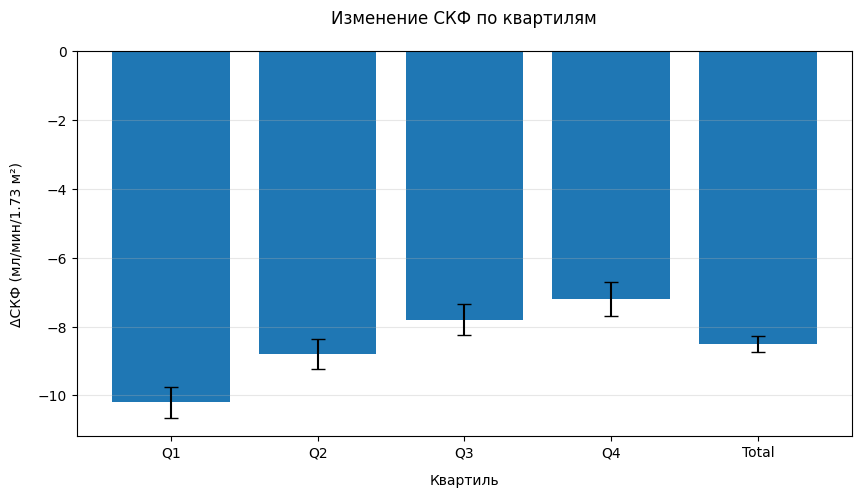

In [19]:
plt.figure(figsize=(10, 5))
plt.bar(eGFR_df['Quartile'], eGFR_df['mean_change'],
        yerr=eGFR_df['SEM'],
        capsize=5,
        color='#1f77b4')
plt.title('Изменение СКФ по квартилям', pad=20)
plt.xlabel('Квартиль', labelpad=10)
plt.ylabel('ΔСКФ (мл/мин/1.73 м²)', labelpad=10)
plt.grid(axis='y', alpha=0.3)
plt.show()